In [1]:
name = "Satwik Saxena"
enrollment = "TCA2357046"
print(name,"\n",enrollment)

Satwik Saxena 
 TCA2357046


In [2]:
import kagglehub

path = kagglehub.dataset_download("neurocipher/heartdisease")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 3.41k/3.41k [00:00<00:00, 810kB/s]

Extracting files...
Path to dataset files: C:\Users\SATWIK\.cache\kagglehub\datasets\neurocipher\heartdisease\versions\1


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "neurocipher/heartdisease",
    "Heart_Disease_Prediction.csv"
)

print(df.head())


Download already complete (11928 bytes).
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7     

In [4]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
print(df.info())


Shape: (270, 14)

Columns:
 Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression  

In [5]:
print("\nNull values in each column:")
print(df.isnull().sum())



Null values in each column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [11]:
df = df.dropna()
print("After removing nulls:", df.shape)
print(df.columns)



After removing nulls: (192, 14)
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [7]:
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Sex: 0 outliers
Chest pain type: 20 outliers
BP: 9 outliers
Cholesterol: 5 outliers
FBS over 120: 40 outliers
EKG results: 0 outliers
Max HR: 1 outliers
Exercise angina: 0 outliers
ST depression: 4 outliers
Slope of ST: 0 outliers
Number of vessels fluro: 19 outliers
Thallium: 0 outliers


In [8]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("After removing outliers:", df.shape)


After removing outliers: (192, 14)


In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)


Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease'],
      dtype='object')


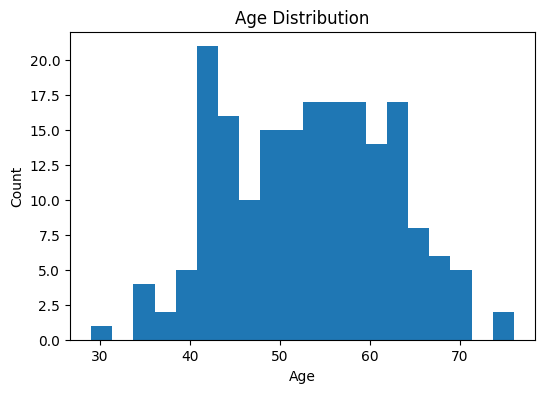

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


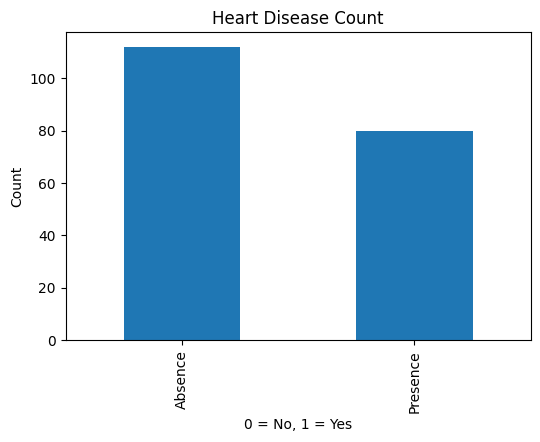

In [15]:
plt.figure(figsize=(6,4))
df['heart_disease'].value_counts().plot(kind='bar')
plt.title("Heart Disease Count")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Count")
plt.show()


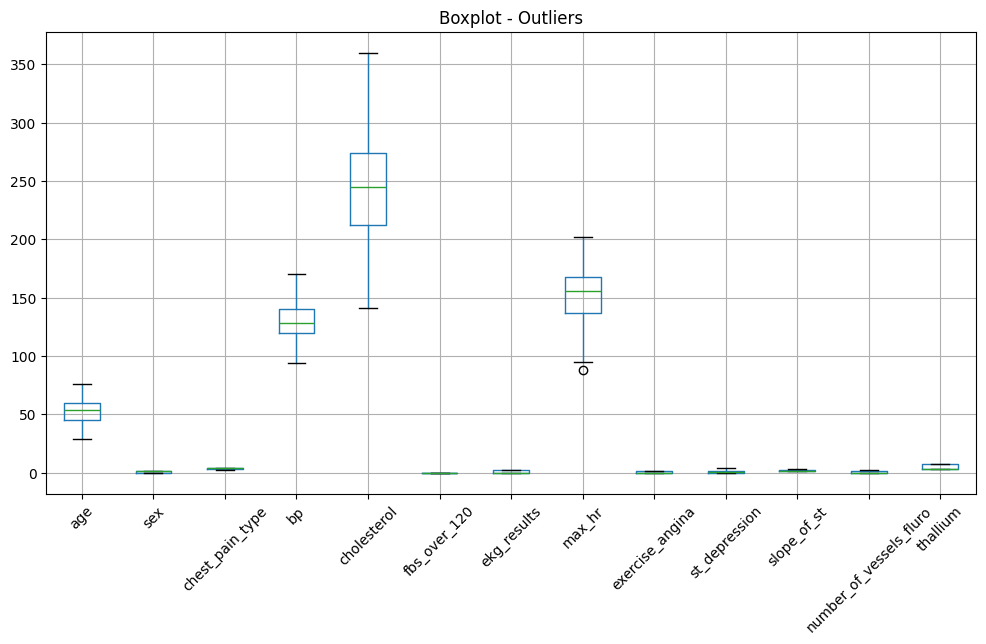

In [16]:
plt.figure(figsize=(12,6))
df.boxplot(rot=45)
plt.title("Boxplot - Outliers")
plt.show()


In [17]:
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = len(df[(df[col] < lower) | (df[col] > upper)])
    print(f"{col}: {count} outliers")


age: 0 outliers
sex: 0 outliers
chest_pain_type: 0 outliers
bp: 0 outliers
cholesterol: 0 outliers
fbs_over_120: 0 outliers
ekg_results: 0 outliers
max_hr: 1 outliers
exercise_angina: 0 outliers
st_depression: 0 outliers
slope_of_st: 0 outliers
number_of_vessels_fluro: 0 outliers
thallium: 0 outliers
